In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
data = pd.read_csv('book.csv',sep=',')
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(data, min_support=0.001, max_len=3,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
226,0.0090,"(ItalArt, GeogBks, Florence)"
227,0.0125,"(ItalArt, ItalCook, ItalAtlas)"
228,0.0040,"(ItalCook, Florence, ItalAtlas)"
229,0.0095,"(ItalArt, ItalCook, Florence)"


In [4]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of      support                         itemsets
2     0.4310                        (CookBks)
0     0.4230                       (ChildBks)
3     0.2820                       (DoItYBks)
6     0.2760                        (GeogBks)
12    0.2560              (CookBks, ChildBks)
..       ...                              ...
219   0.0040    (ArtBks, Florence, ItalAtlas)
228   0.0040  (ItalCook, Florence, ItalAtlas)
230   0.0040   (ItalArt, Florence, ItalAtlas)
145   0.0035  (YouthBks, Florence, ItalAtlas)
194   0.0030  (Florence, ItalAtlas, DoItYBks)

[231 rows x 2 columns]>

In [5]:
#rules for supoort metric = 0.001
rule1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rule1.head(20)
rule1.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
738,"(ItalArt, RefBks)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
743,(ItalAtlas),"(ItalArt, RefBks)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
753,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
752,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
361,(ItalArt),"(ArtBks, ItalCook)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
360,"(ArtBks, ItalCook)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
567,(ItalAtlas),"(RefBks, ItalCook)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
562,"(RefBks, ItalCook)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
1080,"(Florence, ItalAtlas)",(ItalArt),0.0065,0.0485,0.0040,0.615385,12.688343,0.003685,2.473900
1081,(ItalArt),"(Florence, ItalAtlas)",0.0485,0.0065,0.0040,0.082474,12.688343,0.003685,1.082803


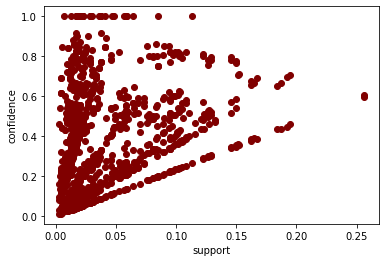

In [6]:
#visualization for rule1
import matplotlib.pyplot as plt
plt.scatter('support', 'confidence',data = rule1,color ='maroon')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [7]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets = apriori(data, min_support=0.005, max_len=4,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
498,0.0090,"(ItalArt, ArtBks, GeogBks, Florence)"
499,0.0125,"(ItalArt, ArtBks, ItalCook, ItalAtlas)"
500,0.0095,"(ItalArt, ArtBks, ItalCook, Florence)"
501,0.0090,"(ItalArt, GeogBks, ItalCook, ItalAtlas)"


In [8]:
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
frequent_itemsets.sort_values

<bound method DataFrame.sort_values of      support                                 itemsets
2     0.4310                                (CookBks)
0     0.4230                               (ChildBks)
3     0.2820                               (DoItYBks)
6     0.2760                                (GeogBks)
12    0.2560                      (CookBks, ChildBks)
..       ...                                      ...
370   0.0055  (ArtBks, YouthBks, ItalAtlas, DoItYBks)
397   0.0055   (ArtBks, YouthBks, Florence, ItalCook)
392   0.0050   (GeogBks, ArtBks, YouthBks, ItalAtlas)
403   0.0050  (GeogBks, YouthBks, ItalAtlas, ItalArt)
319   0.0050    (ItalArt, RefBks, Florence, ChildBks)

[503 rows x 2 columns]>

In [9]:
#rules for supoort metric = 0.005
rule2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rule2.head(20)
rule2.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2160,"(ItalArt, RefBks)","(ArtBks, ItalAtlas)",0.0200,0.0180,0.0165,0.825000,45.833333,0.01614,5.611429
2165,"(ArtBks, ItalAtlas)","(ItalArt, RefBks)",0.0180,0.0200,0.0165,0.916667,45.833333,0.01614,11.760000
3371,"(GeogBks, ItalAtlas)","(ItalArt, RefBks)",0.0205,0.0200,0.0115,0.560976,28.048780,0.01109,2.232222
3366,"(ItalArt, RefBks)","(GeogBks, ItalAtlas)",0.0200,0.0205,0.0115,0.575000,28.048780,0.01109,2.304706
3165,"(ItalCook, ItalAtlas)","(ItalArt, RefBks)",0.0230,0.0200,0.0125,0.543478,27.173913,0.01204,2.146667
3160,"(ItalArt, RefBks)","(ItalCook, ItalAtlas)",0.0200,0.0230,0.0125,0.625000,27.173913,0.01204,2.605333
2567,"(ItalAtlas, ChildBks)","(ItalArt, RefBks)",0.0285,0.0200,0.0145,0.508772,25.438596,0.01393,1.995000
2562,"(ItalArt, RefBks)","(ItalAtlas, ChildBks)",0.0200,0.0285,0.0145,0.725000,25.438596,0.01393,3.532727
3836,"(ItalArt, RefBks)","(ItalAtlas, DoItYBks)",0.0200,0.0190,0.0095,0.475000,25.000000,0.00912,1.868571
3841,"(ItalAtlas, DoItYBks)","(ItalArt, RefBks)",0.0190,0.0200,0.0095,0.500000,25.000000,0.00912,1.960000


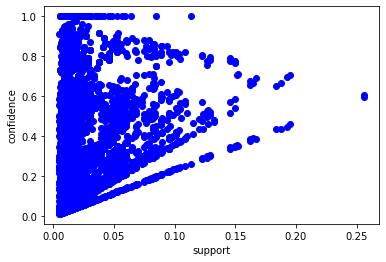

In [11]:
#visualization for rule1
import matplotlib.pyplot as plt
plt.scatter('support', 'confidence',data = rule2,color ='blue')
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()